<a href="https://colab.research.google.com/github/Rapurva/Financial-Trials/blob/master/Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install utils

In [2]:
!pip install mxnet

In [0]:
from utils import *
import time
import numpy as np

from mxnet import nd, autograd, gluon
from mxnet.gluon import nn, rnn
import mxnet as mx
import datetime
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import accuracy_score

In [0]:
import warnings
warnings.filterwarnings("ignore")
context = mx.cpu(); model_ctx=mx.cpu()
mx.random.seed(1719)

In [49]:
import pandas_datareader as web
stock = 'AUROPHARMA.NS'
stdate = '2010-01-01'
endate = '2020-01-08'
#Get the Stock Quote: The price of a stock as quoted on an exchange
dataset_ex_df = web.DataReader(stock, data_source='yahoo', start=stdate, end=endate) #end = '2017-12-31', format = 'YYYY-MM-DD'
#Show the data
dataset_ex_df.reset_index(level=0, inplace=True)
dataset_ex_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,93.000000,89.830002,91.500000,92.695000,1352610.0,71.334839
1,2010-01-05,94.489998,90.099998,94.489998,91.625000,1147940.0,70.511406
2,2010-01-06,92.570000,90.154999,91.900002,90.745003,1571850.0,69.834190
3,2010-01-07,91.769997,88.620003,91.769997,88.875000,1824660.0,68.395119
4,2010-01-08,90.900002,88.199997,88.875000,89.635002,1433440.0,68.979988


In [6]:
print('There are {} number of days in the dataset.'.format(dataset_ex_df.shape[0]))

There are 2468 number of days in the dataset.


In [7]:
num_training_days = int(dataset_ex_df.shape[0]*.7)
print('Number of training days: {}. Number of test days: {}.'.format(num_training_days, \
                                                                    dataset_ex_df.shape[0]-num_training_days))

Number of training days: 1727. Number of test days: 741.


In [0]:
import time
from datetime import datetime
dt = dataset_ex_df['Date'][int(dataset_ex_df.shape[0]*.7)].to_pydatetime()

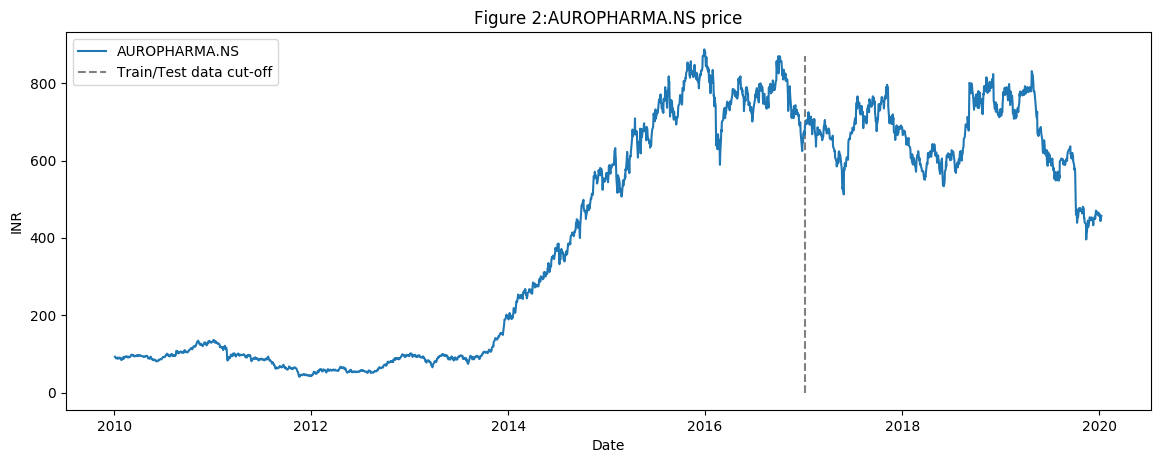

In [9]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['Close'], label= stock)
plt.vlines(dt, 0, 870, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('INR')
plt.title('Figure 2:' + stock + ' price')
plt.legend()
plt.show()

In [10]:
!pip install stockstats

In [0]:
from stockstats import StockDataFrame as Sdf
stockfile = Sdf.retype(dataset_ex_df)

In [0]:
def get_technical_indicators(dataset):
  from stockstats import StockDataFrame as Sdf
  stockfile = Sdf.retype(dataset)

  # Create 7 and 21 days Moving Average
  dataset['ma7'] = dataset['close'].rolling(window=7).mean()
  dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
  # Create MACD
  # dataset['MACD'] = stockfile.get('macd')
  
  # Create Bollinger Bands
  dataset['20sd'] = stockfile.get('boll')
  dataset['upper_band'] = stockfile.get('boll_ub')
  dataset['lower_band'] = stockfile.get('boll_lb')
    
  # Create Exponential moving average
  dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
   
  # Create Momentum
  dataset['momentum'] = dataset['close']-1
  return dataset

In [48]:
dataset_ex_df.columns

Index(['high', 'low', 'open', 'close', 'volume', 'adj close', 'ma7', 'ma21',
       'close_20_sma', 'close_20_mstd', 'boll', 'boll_ub', 'boll_lb', '20sd',
       'upper_band', 'lower_band', 'ema', 'momentum'],
      dtype='object')

In [0]:
dataset_TI_df = get_technical_indicators(dataset_ex_df)